<a href="https://colab.research.google.com/github/sakhilesk/WHO-Covid-19-data-analysis/blob/main/Covid_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
covid_data = pd.read_csv('/content/WHO-COVID-19-global-data.csv')

In [ ]:
covid_data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [ ]:
covid_data['Date_reported'] = pd.to_datetime(covid_data['Date_reported'])

In [ ]:
daily_new_cases = covid_data.groupby('Date_reported')['New_cases'].sum().fillna(0)

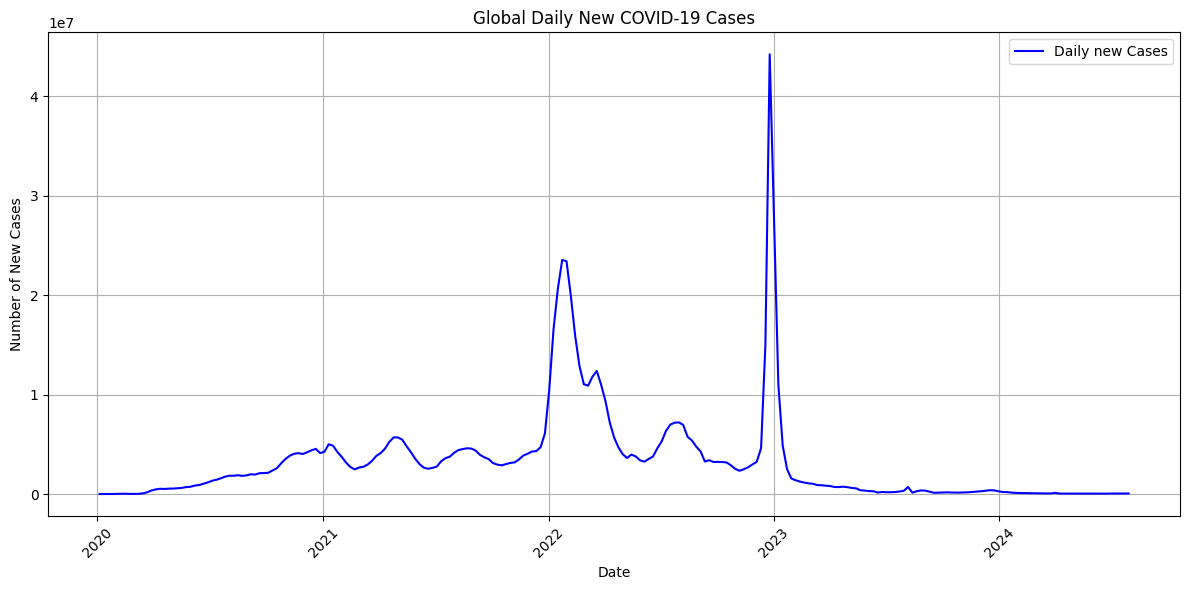

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_new_cases.index, daily_new_cases.values, label='Daily new Cases', color='b')
plt.title('Global Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
daily_cumulative_cases = covid_data.groupby('Date_reported')['Cumulative_cases'].sum().fillna(0)

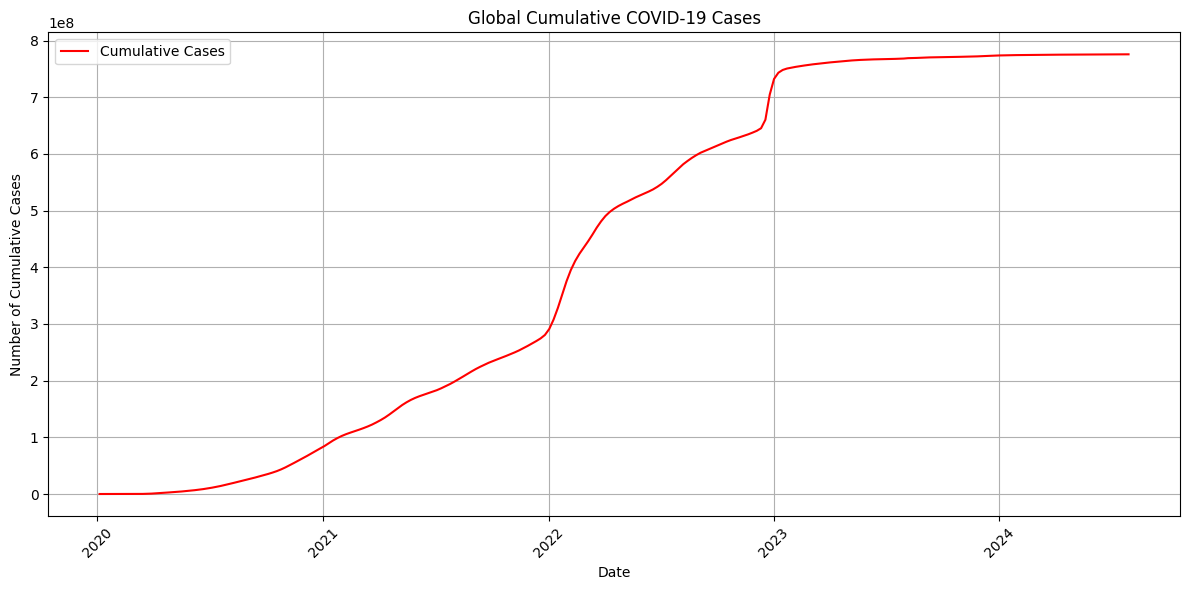

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_cumulative_cases.index, daily_cumulative_cases.values,label='Cumulative Cases', color='r')
plt.title('Global Cumulative COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cumulative Cases')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
daily_new_deaths = covid_data.groupby('Date_reported')['New_deaths'].sum().fillna(0)

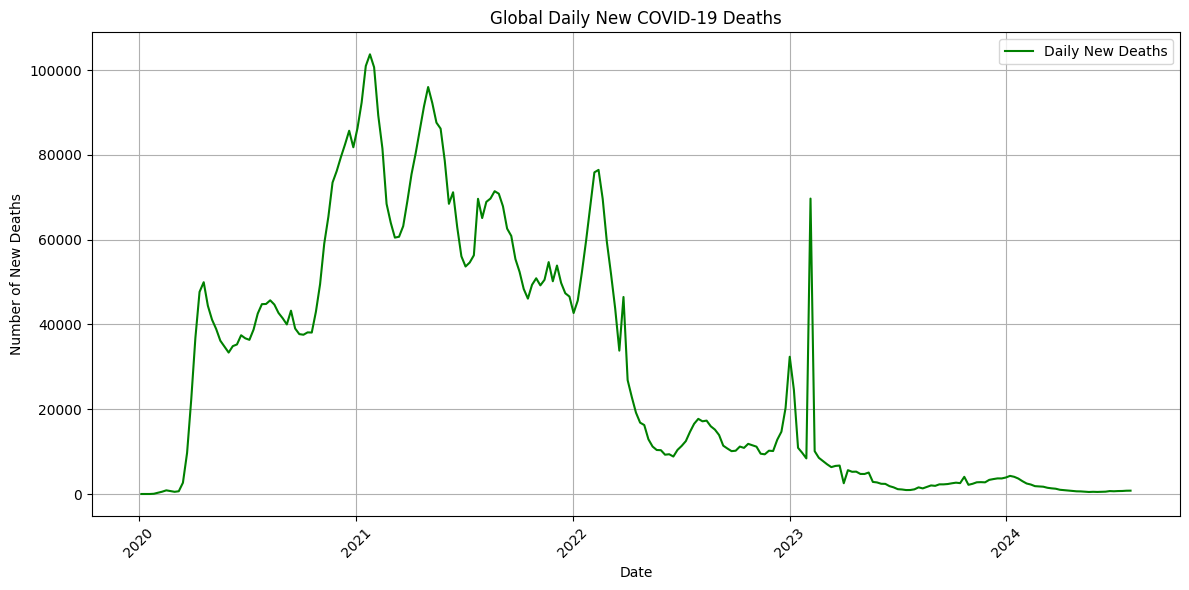

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_new_deaths.index, daily_new_deaths.values, label='Daily New Deaths', color='g')
plt.title('Global Daily New COVID-19 Deaths')
plt.xlabel('Date')
plt.ylabel('Number of New Deaths')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
daily_cumulative_deaths = covid_data.groupby('Date_reported')['Cumulative_deaths'].sum().fillna(0)

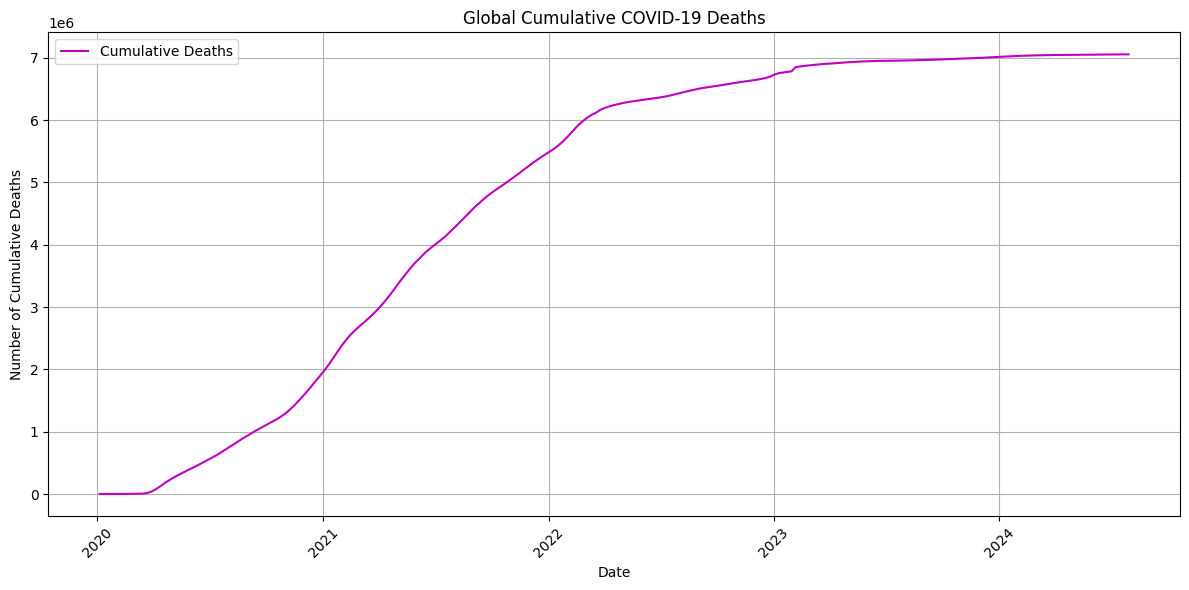

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_cumulative_deaths.index, daily_cumulative_deaths.values, label='Cumulative Deaths', color='m')
plt.title('Global Cumulative COVID-19 Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Cumulative Deaths')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
covid_data['CFR'] = (covid_data['Cumulative_deaths'] / covid_data['Cumulative_cases']) * 100

In [ ]:
daily_cfr = covid_data.groupby('Date_reported')['CFR'].mean().fillna(0)

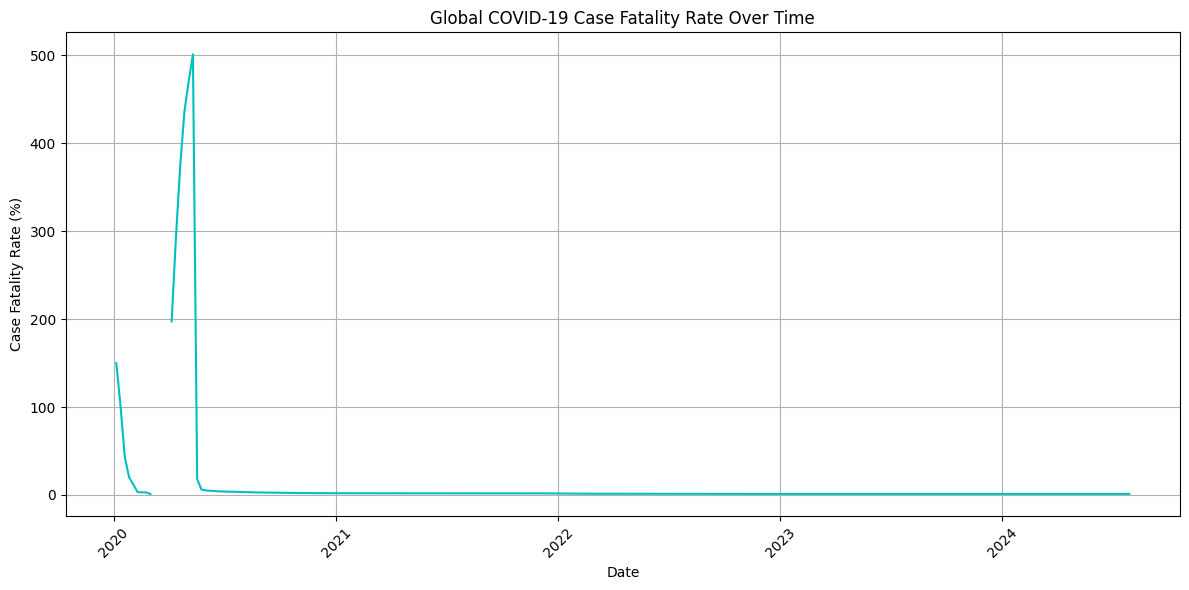

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_cfr.index, daily_cfr.values, label='Case Fatality Rate (%)', color='c')
plt.title('Global COVID-19 Case Fatality Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Case Fatality Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
regional_data = covid_data.groupby(['WHO_region', 'Date_reported'])[['New_cases', 'New_deaths']].sum().reset_index()

In [ ]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

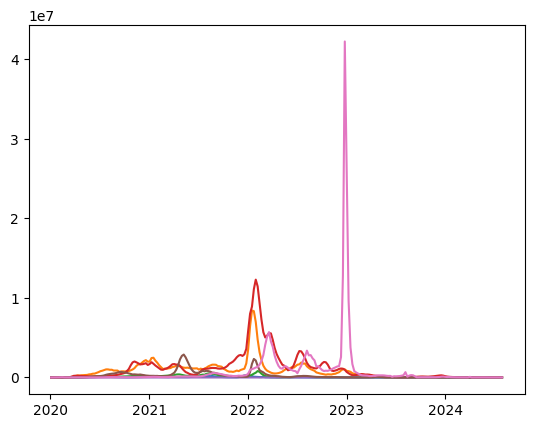

In [ ]:
regions = regional_data['WHO_region'].unique()
for region in regions:
  regional_cases = regional_data[regional_data['WHO_region'] == region].groupby('Date_reported')['New_cases'].sum()
  plt.plot(regional_cases.index, regional_cases.values, label=region)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
covid_data['Growth_rate_cases'] = covid_data.groupby('Country')['Cumulative_cases'].pct_change() * 100
covid_data['Growth_rate_deaths'] = covid_data.groupby('Country')['Cumulative_deaths'].pct_change()* 100

In [ ]:
global_growth_rate_cases = covid_data.groupby('Date_reported')['Growth_rate_cases'].mean().fillna(0)
global_growth_rate_deaths = covid_data.groupby('Date_reported')['Growth_rate_deaths'].mean().fillna(0)

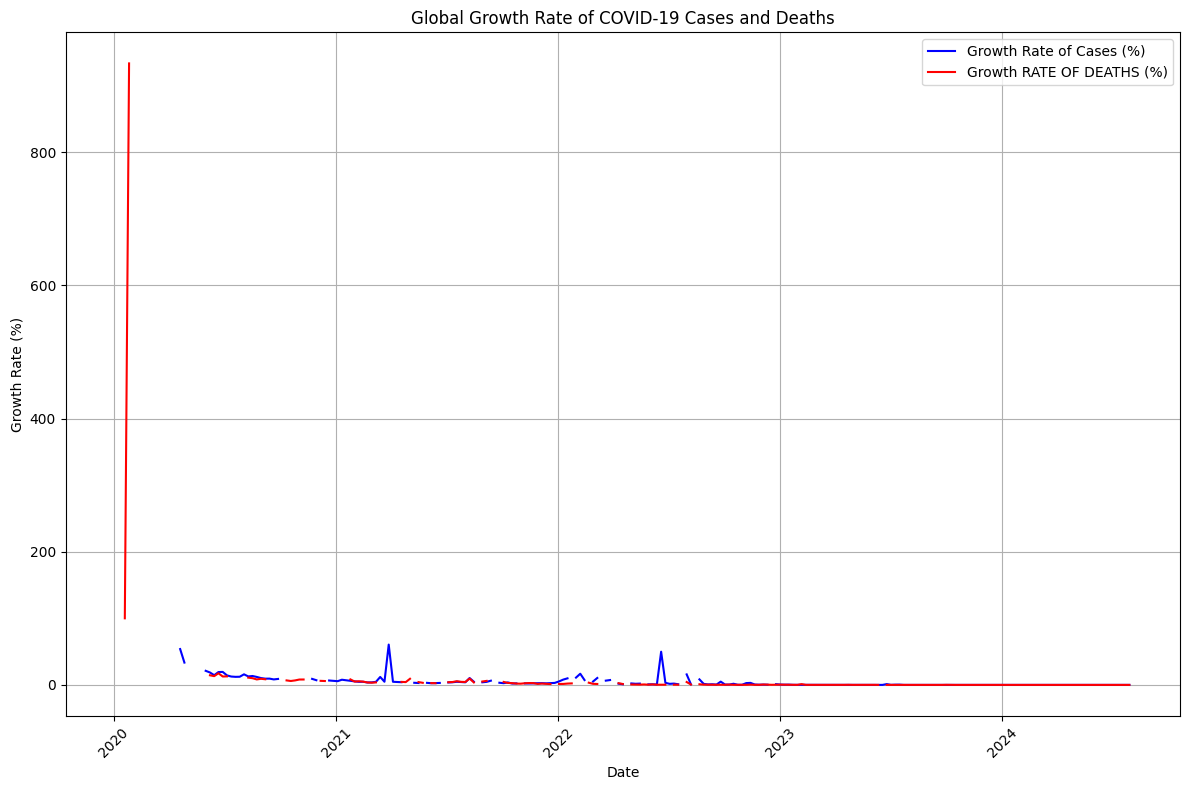

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(global_growth_rate_cases.index, global_growth_rate_cases.values,label='Growth Rate of Cases (%)', color='blue')
plt.plot(global_growth_rate_deaths.index, global_growth_rate_deaths.values, label='Growth RATE OF DEATHS (%)', color='red')
plt.title('Global Growth Rate of COVID-19 Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()